# <font face="Trebuchet MS" size=6 color=black >COMP41680 Assignment 2

## <font face="Trebuchet MS" size=4 color=black >**Overview:**

   <font face="Trebuchet MS" size=2.5 color=black >    &emsp; &emsp; The objective of this assignment is to scrape a collection of GPX files from the http://mlg.ucd.ie/modules/python/EVdata web pages and perform some analysis. GPX is an XML-based format for GPS data
1. These GPX files have been copied from eurovelo.com.

In [2]:
# the library needed
import requests
import urllib.request
from bs4 import BeautifulSoup
import gpxpy
import gpxpy.gpx
import math
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import json
import time

## <font face="Trebuchet MS" size=4 color=black >Task 1: Data Collection

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;Scrape the GPX files from http://mlg.ucd.ie/modules/python/EVdata. 

In [3]:
url = 'http://mlg.ucd.ie/modules/python/EVdata'
r =  urllib.request.urlopen(url)
html = r.read().decode('utf-8')
html

'<!DOCTYPE html>\n<html>\n<head>\n<meta NAME="robots" CONTENT="noindex,nofollow">\n<meta charset="utf-8" />\n<title>EuroVelo 1</title>\n</head>\n<body style="font-family:Arial;" >\n\n          <img src="ev_image.jpeg" alt="EuroVelo Logo"> \n            <h2>EuroVelo Route List</h2>\n                <p>Links to web pages for each of the EuroVelo routes.</p> \n              <ul>\n                      <li> <a href="ev1.html" >\n                                1. Atlantic Coast Route\n                                </a></li>\n                                <li> <a href="ev2.html">\n                                    2. Capitals Route\n                                </a></li>\n                                <li><a href="ev3.html">\n                                   3. Pilgrims Route\n                                </a></li>\n                                 <li><a href="ev4.html">\n                                    4. Central Europe Route\n                                </a></li> 

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; This function is used to save the HTML file of the downloaded route as a GPX file.

In [4]:
def saveGpx(file_name, file_content):
    with open(file_name.replace('.html', '') + '.gpx', 'wb') as f:
        print(file_name.replace('.html', '') + '.gpx Download')
        f.write(file_content)



<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; This function is used to find the three flattest contiguous stages in a route.

In [5]:
def Three_Flattest(a):
    num = 3
    sum = [0] * (len(a) + 1)
    # Cumulative summation, e.g., the sum of the first n numbers, all the way to the sum of all the last numbers
    for i in range(1, len(a) + 1):
        sum[i] = sum[i - 1] + a[i - 1];

    min = float('inf')
    # Record index
    flag = 0
    for i in range(num, len(a) + 1):
        # Starting from the sum of all, subtract the sum of the reciprocal num numbers
        if (sum[i] - sum[i - num] < min):
            # Find the minimum
            min = sum[i] - sum[i - num]
            flag = i

    return [(flag-3),(flag-2),(flag-1)],min

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; This function is used to find the five hilliest (most uphill) contiguous stages in a route.

In [6]:
def Most_Uphill(a):
    num = 5
    sum = [0]*(len(a)+1)
    # Cumulative summation, e.g., the sum of the first n numbers, all the way to the sum of all the last numbers
    for i in range(1,len(a)+1):
        sum[i] = sum[i-1] + a[i-1];

    max = float('-inf')
    # Record index
    flag =0
    for i in range(num,len(a)+1):
        # Starting from the sum of all, subtract the sum of the reciprocal num numbers
        if(sum[i]-sum[i-num] > max):
            # Find the maximum
            max = sum[i] - sum[i-num]
            flag = i

    return [(flag-5),(flag-4),(flag-3),(flag-2),(flag-1)],max



<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Using BeautifulSoup to parse HTML files to get download route data.

In [7]:
soup = BeautifulSoup(html,features="html.parser")

Link = {}
# Get the HTML files for 17 routes.
for link in soup.findAll('a'):
    Link[link.string.strip()] = link.get('href')

# Save HTML files of 17 routes as GPX files
for i in Link.keys():
   r2 = urllib.request.urlopen(url+'/'+ Link.get(i))
   h2 = r2.read().decode('utf-8')
   soup = BeautifulSoup(h2,features="html.parser")
   link = soup.find('a').get('href')
   r3 = urllib.request.urlopen(url+'/'+link)
   h3 = r3.read()
   saveGpx(i,h3)


1. Atlantic Coast Route.gpx Download
2. Capitals Route.gpx Download
3. Pilgrims Route.gpx Download
4. Central Europe Route.gpx Download
5. Via Romea (Francigena).gpx Download
6. Atlantic – Black Sea.gpx Download
7. Sun Route.gpx Download
8. Mediterranean Route.gpx Download
9. Baltic – Adriatic.gpx Download
10. Baltic Sea Cycle Route.gpx Download
11. East Europe Route.gpx Download
12. North Sea Cycle Route.gpx Download
13. Iron Curtain Trail.gpx Download
14. Waters of Central Europe.gpx Download
15. Rhine Cycle Route.gpx Download
17. Rhone Cycle Route.gpx Download
19. Meuse Cycle Route.gpx Download


## <font face="Trebuchet MS" size=4 color=black >Task 2: Generate summary statistics

###  <font face="Trebuchet MS" size=3 color=black > 2.1 What is the longest stage in EuroVelo 6? 

 <font face="Trebuchet MS" size=2.5 color=black >    &emsp; &emsp; Open the GPX file of EuroVelo 6.

In [8]:
# EuroVelo 6
gpx_file_6 = open('6. Atlantic – Black Sea.gpx', 'rb')
gpx_6 = gpxpy.parse(gpx_file_6)
gpx_6.tracks[0:5]

[GPXTrack(name='01: Le Pellerin – Saint-Brevin-les-Pins (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='02: Nantes – Le Pellerin (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='03: Morlaix Train Station – Saint-Florent-le-Vieil (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='04: Saint-Florent-le-Vieil – Angers (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='05: Angers – Saumur (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])])]

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Get data for each stage of the route.

In [9]:
stageInfo_6 = []
for track in gpx_6.tracks:
    for segment in track.segments:
        # Get the name of each stage of the route and calculate the stage length, stage uphill and downhill.
        stageInfo_6.append([track.name,segment.length_3d()/1000,list(segment.get_uphill_downhill())[0]])

df_6 = pd.DataFrame(stageInfo_6)
df_6.columns  = ['Stage_name','Length_km','Total_uphill']
df_6.head(5)

,Stage_name,Length_km,Total_uphill
0,01: Le Pellerin – Saint-Brevin-les-Pins (Devel...,36.223854,17.21
1,02: Nantes – Le Pellerin (Developed with signs),23.220107,63.98
2,03: Morlaix Train Station – Saint-Florent-le-V...,51.968061,28.83
3,04: Saint-Florent-le-Vieil – Angers (Developed...,50.932534,104.58
4,05: Angers – Saumur (Developed with signs),56.601784,105.33


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;  Length per stage plot

<AxesSubplot:>

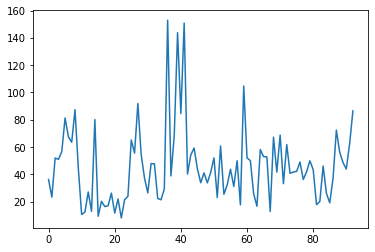

In [10]:
df_6.Length_km.plot()

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; The plot shows that the length of the longest stage is between 140 and 160 in EuroVelo 6.

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Get the longest stage data

In [11]:
MaxLength = df_6['Length_km'].max()
df_6.loc[df_6['Length_km'] == MaxLength]

,Stage_name,Length_km,Total_uphill
36,37: Tuttlingen – Ulm (Developed with signs),152.990887,293.28


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; The longest stage is 37: Tuttlingen - Ulm, with a length of 152.990887 km.

###  <font face="Trebuchet MS" size=3 color=black > 2.2 What is the stage in EuroVelo 1 with the most uphill?

 <font face="Trebuchet MS" size=2.5 color=black >    &emsp; &emsp; Open the GPX file of EuroVelo 1.

In [12]:
# EuroVelo 1
gpx_file_1 = open('1. Atlantic Coast Route.gpx', 'rb')
gpx_1 = gpxpy.parse(gpx_file_1)
gpx_1.tracks[0:5]

[GPXTrack(name='001: Nordkapp – Honningsvag (Developed)', description='Developed', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='002: Honningsvag – Repvag (Developed)', description='Developed', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='003: Repvag – Olderfjord (Developed)', description='Developed', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='004: Olderfjord – Jorehacopma (Developed)', description='Developed', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='005: Jorehacopma – Alta (Developed)', description='Developed', segments=[GPXTrackSegment(points=[...])])]

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Get data for each stage of the route.

In [13]:
stageInfo_1 = []
for track in gpx_1.tracks:
    for segment in track.segments:
        # Get the name of each stage of the route and calculate the stage length, stage uphill and downhill.
        stageInfo_1.append([track.name,segment.length_3d()/1000,list(segment.get_uphill_downhill())[0]])
        
df_1 = pd.DataFrame(stageInfo_1)
df_1.columns  = ['Stage_name','Length_km','Total_uphill']
df_1.head(5)

,Stage_name,Length_km,Total_uphill
0,001: Nordkapp – Honningsvag (Developed),30.140299,243.48
1,002: Honningsvag – Repvag (Developed),50.802539,177.63
2,003: Repvag – Olderfjord (Developed),44.651227,353.83
3,004: Olderfjord – Jorehacopma (Developed),56.410819,432.93
4,005: Jorehacopma – Alta (Developed),52.588302,198.44


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;  Uphill per stage plot

<AxesSubplot:>

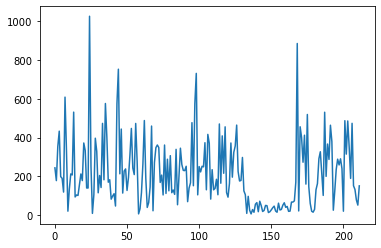

In [14]:
df_1.Total_uphill.plot()

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; As can be seen from the plote most uphill stage has an altitude of more than 1000 m.

In [15]:
MostUphill = df_1['Total_uphill'].max()
df_1.loc[df_1['Total_uphill'] == MostUphill]

,Stage_name,Length_km,Total_uphill
24,025: Kilboghavn – Nesna (Developed),89.652503,1026.1


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; The most uphill stage is 25: Kilboghavn – Nesna, with an altitude of 1026.1 m.

###  <font face="Trebuchet MS" size=3 color=black > 2.3 What are the three flattest contiguous stages in EuroVelo 2?

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Open the GPX file of EuroVelo 2

In [16]:
# EuroVelo 2
gpx_file_2= open('2. Capitals Route.gpx', 'rb')
gpx_2 = gpxpy.parse(gpx_file_2)
gpx_2.tracks[0:5]

[GPXTrack(name='01: Athlone – Kinnegad (Developed)', description='Developed', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='02: Kinnegad – Maynooth (Developed)', description='Developed', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='03: Maynooth – Dublin (Developed)', description='Developed', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='04: Holyhead – Bangor (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='05: Bangor – Porthmadog (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])])]

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Get data for each stage of the route

In [17]:
stageInfo_2 = []
for track in gpx_2.tracks:
    for segment in track.segments:
        # Get the name of each stage of the route and calculate the stage length, stage uphill and downhill.
        stageInfo_2.append([track.name,segment.length_3d()/1000,list(segment.get_uphill_downhill())[0]])
        
df_2=pd.DataFrame(stageInfo_2)
df_2.columns  = ['Stage_name','Length_km','Total_uphill']
df_2.head(5)

,Stage_name,Length_km,Total_uphill
0,01: Athlone – Kinnegad (Developed),62.560925,68.39
1,02: Kinnegad – Maynooth (Developed),40.248783,10.94
2,03: Maynooth – Dublin (Developed),26.016520,7.91
3,04: Holyhead – Bangor (Developed with signs),46.827279,164.99
4,05: Bangor – Porthmadog (Developed with signs),97.146697,322.08


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Calculate the Total_uphill difference of each stage

In [18]:
df_2['uphill_diff'] = df_2['Total_uphill'].diff()
df_2 = df_2.fillna(0)
df_2.head(5)

,Stage_name,Length_km,Total_uphill,uphill_diff
0,01: Athlone – Kinnegad (Developed),62.560925,68.39,0.00
1,02: Kinnegad – Maynooth (Developed),40.248783,10.94,-57.45
2,03: Maynooth – Dublin (Developed),26.016520,7.91,-3.03
3,04: Holyhead – Bangor (Developed with signs),46.827279,164.99,157.08
4,05: Bangor – Porthmadog (Developed with signs),97.146697,322.08,157.09


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; EuroVelo 2 total length

In [19]:
print('Sum of toall length of the route: %f km' % df_2['Length_km'].sum())

Sum of toall length of the route: 2336.133091 km


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Calculate the cum_uphill and cum_Length of each stage

In [20]:
# Accumulated by column
df_2['cum_uphill'] = df_2['uphill_diff'].cumsum()
# Accumulated by column
df_2['cum_Length'] = df_2['Length_km'].cumsum()
# 
df_2.head(5)

,Stage_name,Length_km,Total_uphill,uphill_diff,cum_uphill,cum_Length
0,01: Athlone – Kinnegad (Developed),62.560925,68.39,0.00,0.00,62.560925
1,02: Kinnegad – Maynooth (Developed),40.248783,10.94,-57.45,-57.45,102.809708
2,03: Maynooth – Dublin (Developed),26.016520,7.91,-3.03,-60.48,128.826228
3,04: Holyhead – Bangor (Developed with signs),46.827279,164.99,157.08,96.60,175.653507
4,05: Bangor – Porthmadog (Developed with signs),97.146697,322.08,157.09,253.69,272.800204


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Visualize the Total_uphill profile

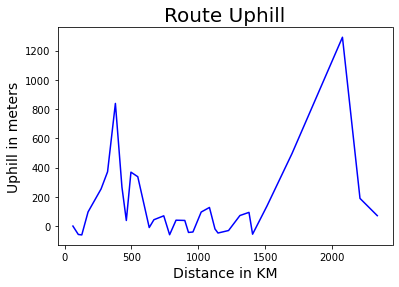

In [21]:
# Set the initial stage to 0 relative to the height of the route level.
plt.plot(df_2['cum_Length'], df_2['cum_uphill'], color='#0000ff')
plt.title('Route Uphill', size=20)
plt.xlabel('Distance in KM', size=14)
plt.ylabel('Uphill in meters', size=14);
plt.show()

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; A diagram of the route's approximate shape as the distance increases. There is a big uphill at the front and back, respectively, and a continuous meandering uphill and downhill in the middle stage. However, it is roughly observed that the three flattest stages are probably the three stages at the beginning of the route.

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Search the three flattest contiguous stages

In [22]:
uphill = df_2['Total_uphill']
index ,m = Three_Flattest(uphill)
print('Sum of toall uphill of the three flattest contiguous stages: %f m' % m)

# The three flattest contiguous stages in EuroVelo 2
df_2[index[0]:index[2]+1]

Sum of toall uphill of the three flattest contiguous stages: 87.240000 m


,Stage_name,Length_km,Total_uphill,uphill_diff,cum_uphill,cum_Length
0,01: Athlone – Kinnegad (Developed),62.560925,68.39,0.00,0.00,62.560925
1,02: Kinnegad – Maynooth (Developed),40.248783,10.94,-57.45,-57.45,102.809708
2,03: Maynooth – Dublin (Developed),26.016520,7.91,-3.03,-60.48,128.826228


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; The shape of the three flattest contiguous stages

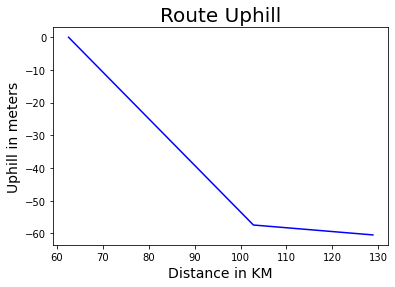

In [23]:
# Set the initial stage to 0 relative to the height of the route level.
plt.plot(df_2[index[0]:index[2]+1]['cum_Length'], df_2[index[0]:index[2]+1]['cum_uphill'], color='#0000ff')
plt.title('Route Uphill', size=20)
plt.xlabel('Distance in KM', size=14)
plt.ylabel('Uphill in meters', size=14);
plt.show()

###  <font face="Trebuchet MS" size=3 color=black > 2.3 Find the five hilliest (most uphill) contiguous stages in EuroVelo 1.

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Calculate the Total_uphill difference of each stage

In [24]:
 # EuroVelo 1

df_1['uphill_diff'] = df_1['Total_uphill'].diff()
df_1 = df_1.fillna(0)
df_1.head(5)

,Stage_name,Length_km,Total_uphill,uphill_diff
0,001: Nordkapp – Honningsvag (Developed),30.140299,243.48,0.00
1,002: Honningsvag – Repvag (Developed),50.802539,177.63,-65.85
2,003: Repvag – Olderfjord (Developed),44.651227,353.83,176.20
3,004: Olderfjord – Jorehacopma (Developed),56.410819,432.93,79.10
4,005: Jorehacopma – Alta (Developed),52.588302,198.44,-234.49


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; EuroVelo 1 total length

In [25]:
print('Sum of toall length of the route: %f km' % df_1['Length_km'].sum())

Sum of toall length of the route: 10475.631568 km


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Calculate the cum_uphill and cum_Length of each stage

In [26]:
df_1['cum_uphill'] = df_1['uphill_diff'].cumsum()
df_1['cum_Length'] = df_1['Length_km'].cumsum()
df_1.head(5)

,Stage_name,Length_km,Total_uphill,uphill_diff,cum_uphill,cum_Length
0,001: Nordkapp – Honningsvag (Developed),30.140299,243.48,0.00,0.00,30.140299
1,002: Honningsvag – Repvag (Developed),50.802539,177.63,-65.85,-65.85,80.942838
2,003: Repvag – Olderfjord (Developed),44.651227,353.83,176.20,110.35,125.594065
3,004: Olderfjord – Jorehacopma (Developed),56.410819,432.93,79.10,189.45,182.004884
4,005: Jorehacopma – Alta (Developed),52.588302,198.44,-234.49,-45.04,234.593186


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Visualize the Total_uphill profile

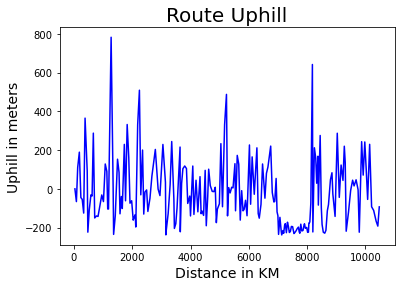

In [27]:
# Set the initial stage to 0 relative to the height of the route level.
plt.plot(df_1['cum_Length'], df_1['cum_uphill'], color='#0000ff',)
plt.title('Route Uphill', size=20)
plt.xlabel('Distance in KM', size=14)
plt.ylabel('Uphill in meters', size=14);
plt.show()

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; The route is long, and the shape of the route is very steep and winding.It can be seen from the figure that there are four peaks in the intervals 0-2000km, 2000-3000km, 4000-6000km, and 8000-9000km. It can be estimated that the five hilliest (most uphill) contiguous stages can be achieved in these four intervals.

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Search the five hilliest (most uphill) contiguous stages in EuroVelo 1

In [28]:
uphill = df_1['Total_uphill']
index ,m = Most_Uphill(uphill)
print('Sum of toall uphill of the five hilliest (most uphill) contiguous stages in EuroVelo 1: %f m' % m)
# The five hilliest (most uphill) contiguous stages in EuroVelo 1
df_1[index[0]:index[4]+1]

Sum of toall uphill of the five hilliest (most uphill) contiguous stages in EuroVelo 1: 2100.040000 m


,Stage_name,Length_km,Total_uphill,uphill_diff,cum_uphill,cum_Length
94,095: Abbeyfeale – Camp (Developed with signs),68.987337,166.39,27.70,-77.09,4987.822144
95,096: Camp – Annascaul (Developed with signs),51.749709,476.75,310.36,233.27,5039.571854
96,097: Annascaul – Glenbeigh (Developed with signs),55.262337,151.19,-325.56,-92.29,5094.834191
97,098: Glenbeigh – Waterville (Developed with si...,72.419119,574.55,423.36,331.07,5167.253310
98,099: Waterville – Kenmare (Developed with signs),64.110925,731.16,156.61,487.68,5231.364236


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; The shape of the five hilliest (most uphill) contiguous stages in EuroVelo 1

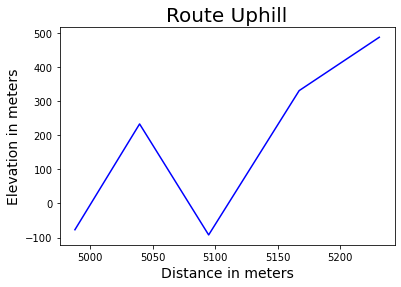

In [29]:
# Set the initial stage to 0 relative to the height of the route level.
plt.plot(df_1[index[0]:index[4]+1]['cum_Length'], df_1[index[0]:index[4]+1]['cum_uphill'], color='#0000ff')
plt.title('Route Uphill', size=20)
plt.xlabel('Distance in meters', size=14)
plt.ylabel('Elevation in meters', size=14);
plt.show()

##   <font face="Trebuchet MS" size=3 color=black > Task 3:  Test the accuracy of the distance estimates
 

###  <font face="Trebuchet MS" size=3 color=black > 3.1 EuroVelo 19's map  

 <font face="Trebuchet MS" size=2.5 color=black >    &emsp; &emsp; Open the GPX file of EuroVelo 19.

In [30]:
# EuroVelo 19
gpx_file_19 = open('19. Meuse Cycle Route.gpx', 'rb')
gpx_19 = gpxpy.parse(gpx_file_19)
gpx_19.tracks[0:5]

[GPXTrack(name='01: Langres – Pouilly-en-bassigny (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='02: Pouilly-en-bassigny – Montigny-le-Roi (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='03: Montigny-le-Roi – Bourmont (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='04: Bourmont – Neufchâteau (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='05: Neufchâteau – Vaucouleurs (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])])]

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Get data for each stage of the route.

In [31]:
stageInfo_19 = []
points_19 =[]

for track in gpx_19.tracks:
    for segment in track.segments:
        stageInfo_19.append([track.name,segment.length_3d()/1000,list(segment.get_uphill_downhill())[0]])
        for point in segment.points:
          points_19.append([point.latitude, point.longitude])
            
df_19 = pd.DataFrame(stageInfo_19)
df_19.columns  = ['Stage_name','Length_km','Total_uphill']
df_19.head(5)

,Stage_name,Length_km,Total_uphill
0,01: Langres – Pouilly-en-bassigny (Developed w...,32.963064,183.36
1,02: Pouilly-en-bassigny – Montigny-le-Roi (Dev...,10.209156,2.75
2,03: Montigny-le-Roi – Bourmont (Developed with...,27.222500,58.67
3,04: Bourmont – Neufchâteau (Developed with signs),29.234196,170.42
4,05: Neufchâteau – Vaucouleurs (Developed with ...,39.127542,79.84


<font face="Trebuchet MS" size=2.5 color=black > &emsp; &emsp; Extract the points from the stages that will be used later.  

In [32]:
# Save every points' latitude and longitude.
df_19_lat_lon =  pd.DataFrame(points_19)
df_19_lat_lon.columns = ['lat','lon']


<font face="Trebuchet MS" size=2.5 color=black > &emsp; &emsp; Construct URL links for each two points and crawl the distance between each two points from Tomtom API.

In [33]:
apiURL      = 'https://api.tomtom.com/routing/1/calculateRoute/'
# Limit 2500 data crawls per day per apiKey
apiKey      = 'mQlqMynFgNTm7qvWlmmkst90zwxvLCeb' 
# apiKey      = 'WhoHemn1t1IWwbg0smUXAXb4TsR3HkbK'
# apiKey      = 'eH0HA0KicZwcLC5dwv7OXTXMF6rIPnKw'

# This functiontion will get the distance  between every two latitudes and longitudes via api
def Dist(df):
    dist = [0]
    for i in range(len(df)):
        if i ==0:
            continue
        else:
            # Construct URL for every two points.Take out the complete route distance
            tomtomURL = "%s/%s,%s:%s,%s/json?key=%s" % (apiURL,df.iloc[i - 1]['lat'],df.iloc[i - 1]['lon'],df.iloc[i]['lat'],df.iloc[i]['lon'],apiKey )
            
            with urllib.request.urlopen(tomtomURL) as url:
                getData = url.read()
                jsonTomTom = json.loads(getData)
                # Get the distance of every two points in each stage via Tomtom API.
                dist.append(jsonTomTom['routes'][0]['summary']['lengthInMeters'])
                
                # Can not crawl too fast, must stop at least 0.1 seconds which will cause the data extraction to be a bit slow
                time.sleep(0.1)
    return dist

<font face="Trebuchet MS" size=2.5 color=black > &emsp; &emsp; The crawled data is as follows

In [34]:
df_19_lat_lon['Length_m'] = Dist(df_19_lat_lon)
df_19_lat_lon.head(5)

,lat,lon,Length_m
0,47.858392,5.332791,0
1,47.858415,5.335235,893
2,47.864041,5.338597,686
3,47.866454,5.343023,431
4,47.867802,5.351278,667


The distance obtained is the distance between the previous point and this one. The first point does not have a previous point, so it is set to 0.

In [35]:
print('Using Tomtom API')
print('Sum of toall length of the route: %f km' % (df_19_lat_lon['Length_m'].sum()/1000))
print('Using length_3d()')
print('Sum of toall length of the route: %f km' % df_19['Length_km'].sum())

Using Tomtom API
Sum of toall length of the route: 2048.168000 km
Using length_3d()
Sum of toall length of the route: 1103.607723 km


The total length of the route obtained via the Tomtom API is twice that obtained by calling the length_3d() method.

<font face="Trebuchet MS" size=2.5 color=black > &emsp; &emsp; Mapping the track

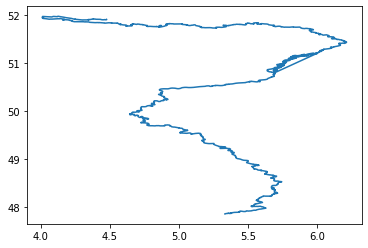

In [36]:
plt.plot(df_19_lat_lon['lon'].values,df_19_lat_lon['lat'].values)

<font face="Trebuchet MS" size=2.5 color=black > &emsp; &emsp; Plotting the road map in the Tomtom map

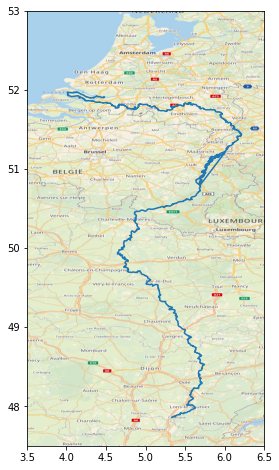

In [37]:
# Map URL
tomMapURL_19 = 'https://api.tomtom.com/map/1/staticimage?key='+apiKey+'&zoom=8&bbox=3.5,46,6.5,53&format=jpg&layer=basic&style=main&view=Unified'
# Get map image
r2 = requests.get(tomMapURL_19)
im = imageio.imread(r2.content)
# Create graphics
plt.figure(figsize=(8,8))
# Display image
plt.imshow(im, extent = (3.5,6.5,47.5,53))
plt.plot(df_19_lat_lon['lon'].values,df_19_lat_lon['lat'].values)


###  <font face="Trebuchet MS" size=3 color=black > 3.2 EuroVelo 12's map  

 <font face="Trebuchet MS" size=2.5 color=black >    &emsp; &emsp; Open the GPX file of EuroVelo 14.

In [38]:
# EuroVelo 14
gpx_file_14 = open('14. Waters of Central Europe.gpx', 'rb')
gpx_14 = gpxpy.parse(gpx_file_14)
gpx_14.tracks[0:5]

[GPXTrack(name='1: Zell Am See – St Johann im Pongau (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='2: St Johann im Pongau – Liezen (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='3: Liezen – World Heritage Graz (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='4: World Heritage Graz – Szentgotthard (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='5: Szentgotthard – Vasvar (Developed with signs)', description='Developed with signs', segments=[GPXTrackSegment(points=[...])])]

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Get data for each stage of the route.

In [39]:
stageInfo_14 = []
points_14 =[]

for track in gpx_14.tracks:
    for segment in track.segments:
        stageInfo_14.append([track.name,segment.length_3d()/1000,list(segment.get_uphill_downhill())[0]])
        for point in segment.points:
          # Get points
          points_14.append([point.latitude, point.longitude])
            
df_14 = pd.DataFrame(stageInfo_14)
df_14.columns  = ['Stage_name','Length_km','Total_uphill']
df_14

,Stage_name,Length_km,Total_uphill
0,1: Zell Am See – St Johann im Pongau (Develope...,40.425506,140.65
1,2: St Johann im Pongau – Liezen (Developed wit...,112.872059,413.70
2,3: Liezen – World Heritage Graz (Developed wit...,162.597112,433.20
3,4: World Heritage Graz – Szentgotthard (Develo...,101.202530,226.02
4,5: Szentgotthard – Vasvar (Developed with signs),68.121948,206.22
5,6: Vasvar – Keszthely (Developed with signs),65.575842,194.39
6,7: Keszthely – Balatonfuzfo (Developed with si...,91.289074,153.89
7,8: Balatonfuzfo – Velence (Developed with signs),66.781224,163.16


<font face="Trebuchet MS" size=2.5 color=black > &emsp; &emsp; Extract the points from the stages that will be used later.  

In [40]:
# Save every points' latitude and longitude.
df_14_lat_lon =  pd.DataFrame(points_14)
df_14_lat_lon.columns = ['lat','lon']

<font face="Trebuchet MS" size=2.5 color=black > &emsp; &emsp; The crawled data is as follows

In [41]:
df_14_lat_lon['Length_m'] = Dist(df_14_lat_lon)
df_14_lat_lon.head(5)

,lat,lon,Length_m
0,47.324004,12.80042,0
1,47.318080,12.79443,935
2,47.304630,12.79531,1602
3,47.284580,12.81537,3578
4,47.287350,12.82266,669


The distance obtained is the distance between the previous point and this one. The first point does not have a previous point, so it is set to 0.

In [42]:
print('Using Tomtom API')
print('Sum of toall length of the route: %f km' % (df_14_lat_lon['Length_m'].sum()/1000))
print('Using length_3d()')
print('Sum of toall length of the route: %f km' % df_14['Length_km'].sum())

Using Tomtom API
Sum of toall length of the route: 1051.185000 km
Using length_3d()
Sum of toall length of the route: 708.865296 km


The total length of the route obtained via the Tomtom API is approximately 1.5 times the length obtained by calling the length_3d() method.

<font face="Trebuchet MS" size=2.5 color=black > &emsp; &emsp; Mapping the track

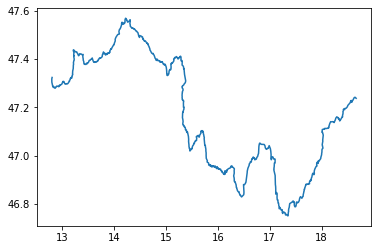

In [43]:
plt.plot(df_14_lat_lon['lon'].values,df_14_lat_lon['lat'].values)

<font face="Trebuchet MS" size=2.5 color=black > &emsp; &emsp; Plotting the road map in the Tomtom map

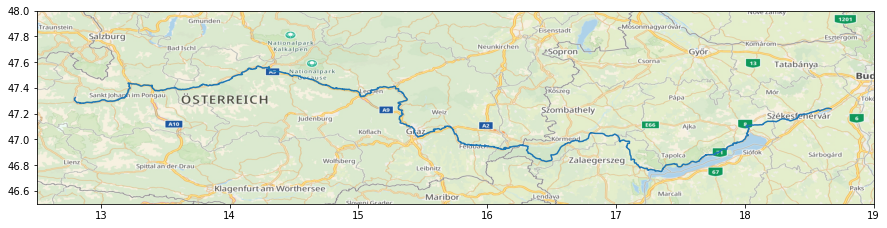

In [44]:
# Map URL
tomMapURL_14 = 'https://api.tomtom.com/map/1/staticimage?key='+apiKey+'&zoom=8&bbox=12.5,46.5,19,48&format=jpg&layer=basic&style=main&view=Unified'

# Get map image
r3 = requests.get(tomMapURL_14)
im = imageio.imread(r3.content)
# Create graphics
plt.figure(figsize=(15,15))
# Display image
plt.imshow(im, extent = (12.5,19,46.5,48))
plt.plot(df_14_lat_lon['lon'].values,df_14_lat_lon['lat'].values)

<font face="Trebuchet MS" size=2.5 color=black >The call to gpxpy's length_3d() method to test the route distance involves the compression of the trajectory data. Due to a large amount of data, the points containing less information are eliminated from the original trajectory due to the limitation of computing power. The similarity between the obtained compressed trajectory and the original trajectory is in about the same condition while also minimizing the amount of trajectory data.

<font face="Trebuchet MS" size=2.5 color=black >Then, the potential data mining speed of the same trajectory data is greatly improved. In this way, the spatiotemporal characteristics of the original trajectory are preserved while reducing the amount of trajectory data. It also ensures that the difference between two trajectory curves is within an acceptable range, which reflects its merits.


<font face="Trebuchet MS" size=2.5 color=black > In the source code of the length_3d() method, the above reasons are considered when calculating the distance. Suppose two points are too far apart, reflected in the difference in latitude and longitude between two points greater than 0.2. In that case, the haversine distance is calculated. That is because haversine is 5-6 times slower than the dummy distance algorithm (which is OK for most GPS tracks). So only the two points that satisfy the above condition will go to compute the haversine distance. However, this distance calculation ignores the straight-line distance that may not be reached by the actual route, which causes errors.


<font face="Trebuchet MS" size=2.5 color=black > And the distance between the latitude and longitude of each two points obtained from the tomtom API is considered from the actual route between this point to the next point, measured and is the actual distance.

<font face="Trebuchet MS" size=2.5 color=black > So in the result, the route distance obtained from tomtomAPI will be more accurate than the route distance obtained from the length_3d() method.